# Exploratory Data Analysis of Dietary and Nutritional Intake Patterns

This notebook performs Exploratory Data Analysis (EDA) on nutritional data to
understand dietary intake patterns, compare nutritional components across
categories, and analyze relationships between key nutrients using
visualization techniques.


In [2]:
import pandas as pd
import random

rows = []

for _ in range(300):   # 300 rows

    meal = random.choice(["Breakfast", "Lunch", "Dinner"])
    gender = random.choice(["Male", "Female"])
    age_group = random.choice(["18-25", "26-35", "36-50"])
    diet_type = random.choice(["Veg", "Non-Veg"])

    if meal == "Breakfast":
        calories = random.randint(1500, 2200)
        protein = random.randint(40, 75)
        fat = random.randint(25, 55)
        carbs = random.randint(200, 300)

    elif meal == "Lunch":
        calories = random.randint(2200, 2600)
        protein = random.randint(70, 100)
        fat = random.randint(45, 75)
        carbs = random.randint(280, 350)

    else:  # Dinner
        calories = random.randint(2600, 3000)
        protein = random.randint(90, 130)
        fat = random.randint(65, 100)
        carbs = random.randint(320, 400)

    if diet_type == "Non-Veg":
        protein += random.randint(5, 20)

    rows.append([
        calories,
        protein,
        fat,
        carbs,
        meal,
        gender,
        age_group,
        diet_type
    ])

df = pd.DataFrame(
    rows,
    columns=[
        "Calories",
        "Protein",
        "Fat",
        "Carbohydrates",
        "Meal_Type",
        "Gender",
        "Age_Group",
        "Diet_Type"
    ]
)

df.to_csv("nutrition_dataset.csv", index=False)

df.head()


,Calories,Protein,Fat,Carbohydrates,Meal_Type,Gender,Age_Group,Diet_Type
0,2078,63,49,245,Breakfast,Male,26-35,Veg
1,1666,77,28,237,Breakfast,Male,36-50,Non-Veg
2,2990,116,81,355,Dinner,Male,26-35,Veg
3,2062,53,50,236,Breakfast,Male,36-50,Veg
4,2855,127,91,392,Dinner,Female,18-25,Non-Veg


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [4]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Calories       300 non-null    int64
 1   Protein        300 non-null    int64
 2   Fat            300 non-null    int64
 3   Carbohydrates  300 non-null    int64
 4   Meal_Type      300 non-null    str  
 5   Gender         300 non-null    str  
 6   Age_Group      300 non-null    str  
 7   Diet_Type      300 non-null    str  
dtypes: int64(4), str(4)
memory usage: 18.9 KB


## Exploratory Data Analysis (EDA)


1️⃣ Distribution of a Numerical Column (Calories)

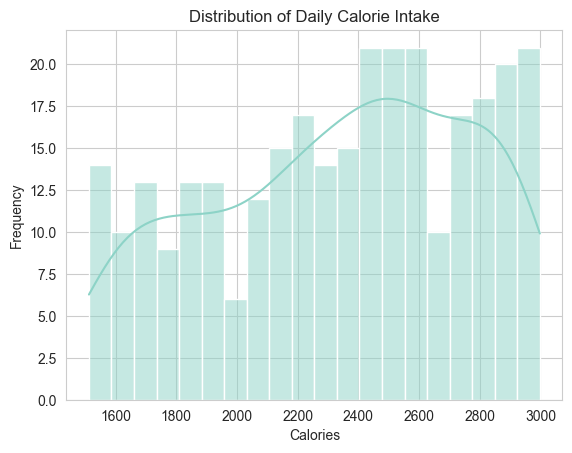

In [7]:
plt.figure()
sns.histplot(df['Calories'], bins=20, kde=True)
plt.title("Distribution of Daily Calorie Intake")
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.show()


2️⃣ Outlier Detection Using Box Plot (Fat Intake)

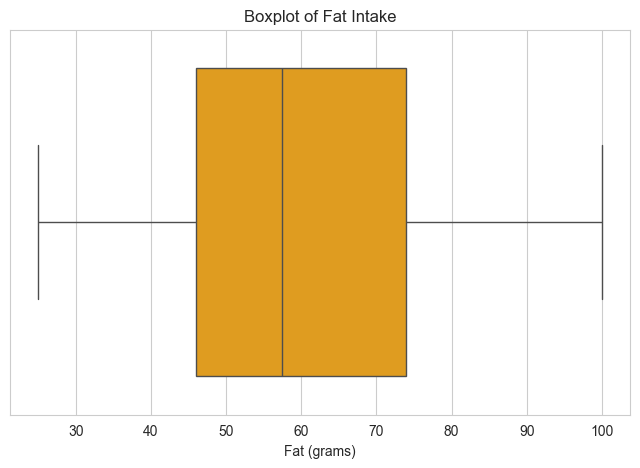

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x=df['Fat'],
    color='orange'
)
plt.title("Boxplot of Fat Intake")
plt.xlabel("Fat (grams)")
plt.show()



3️⃣ Comparison Between Categories (Meal Type vs Calories)

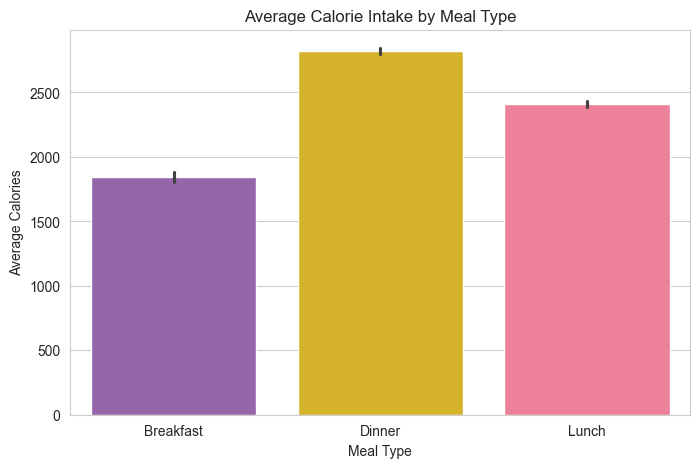

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='Meal_Type',
    y='Calories',
    hue='Meal_Type',
    data=df,
    palette=['#9b59b6', '#f1c40f', '#ff6f91'],  # purple, yellow, pink
    legend=False
)
plt.title("Average Calorie Intake by Meal Type")
plt.xlabel("Meal Type")
plt.ylabel("Average Calories")
plt.show()



4️⃣ Relationship Between Two Numerical Variables (Protein vs Calories)

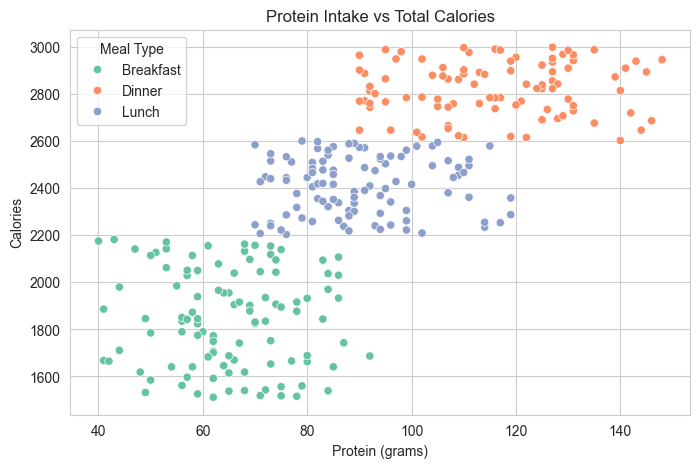

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Protein',
    y='Calories',
    data=df,
    hue='Meal_Type',        # different colors
    palette='Set2'
)
plt.title("Protein Intake vs Total Calories")
plt.xlabel("Protein (grams)")
plt.ylabel("Calories")
plt.legend(title="Meal Type")
plt.show()




5️⃣ Correlation Heatmap of Nutritional Variables

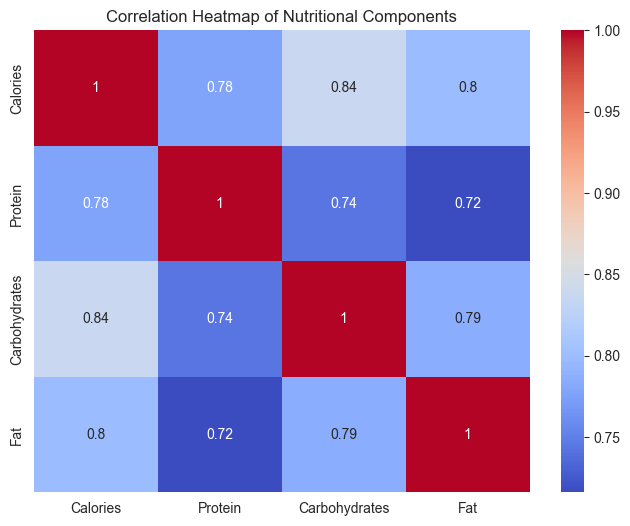

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Calories','Protein','Carbohydrates','Fat']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Nutritional Components")
plt.show()


## Key Insights from Exploratory Data Analysis

1️⃣ **Calorie Distribution**
Calorie intake shows noticeable variability among individuals, reflecting diverse dietary habits.
Most observations lie in a moderate range, with a few higher values indicating increased energy needs.

2️⃣ **Fat Intake & Outliers**
The box plot highlights the presence of outliers in fat consumption across individuals.
This indicates uneven fat intake, with some diets containing significantly higher fat levels.

3️⃣ **Meal Type vs Calories**
Average calorie intake is higher for Lunch and Dinner compared to Breakfast.
This suggests that major meals contribute more substantially to daily energy intake.

4️⃣ **Protein vs Calories Relationship**
A positive relationship is observed between protein intake and total calorie consumption.
Meals higher in protein tend to be more calorie-dense.

5️⃣ **Correlation Between Nutrients**
Calories show a strong positive correlation with carbohydrates and fat intake.
Protein exhibits a moderate correlation, indicating a balanced contribution to energy intake.
